 
<h1>
    <center>
              CSGO - Detectando Ganhador da Rodada </br>
    </center>
<h1>

#### Dados: [CSGO-Round-Winner-Classification]([CSGO-Round-Winner-Classification](https://www.openml.org/search?type=data&sort=runs&id=43430&status=active))


#### Por: [Igor Michetti](https://github.com/igormichetti)


1. [O Conjunto de Dados](#1)
2. [Análise](#2)
3. [Treinamento](#3)

<a id='1'></a>
### 1. Escolhendo o Cojuntos de dados

In [2]:
# Importando das bibliotecas nescessárias
import numpy as np

#Caso não deseje baixar o conjunto de dados 
import openml

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [11]:
dataset = openml.datasets.get_dataset('CSGO-Round-Winner-Classification') 

X, _, attribute_names, target_name = dataset.get_data()


df = pd.DataFrame(data=X , columns=target_name)

#data = pd.read_excel('./csgo_round_snapshots.xlsx')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0,0,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0,0,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CT


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  uint8  
 2   t_score                       122410 non-null  uint8  
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  uint8  
 12  t_helmets                     122410 non-nul

In [13]:
all_columns = set(df.columns)

weapon_columns = [col for col in all_columns if 'weapon' in col]

ct_columns = {col for col in all_columns if 'ct' in col}
t_columns = {col for col in all_columns if 't' in col}
grenade_columns = {col for col in all_columns if 'grenade' in col}

object_columns = {'map', 'round_winner'}
info_columns = list(set(all_columns) - set(weapon_columns) - grenade_columns - object_columns)


numeric_df = df.select_dtypes(exclude='object')
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 95 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  uint8  
 2   t_score                       122410 non-null  uint8  
 3   bomb_planted                  122410 non-null  bool   
 4   ct_health                     122410 non-null  float64
 5   t_health                      122410 non-null  float64
 6   ct_armor                      122410 non-null  float64
 7   t_armor                       122410 non-null  float64
 8   ct_money                      122410 non-null  float64
 9   t_money                       122410 non-null  float64
 10  ct_helmets                    122410 non-null  uint8  
 11  t_helmets                     122410 non-null  uint8  
 12  ct_defuse_kits                122410 non-nul

<a id='2'> </a>

### 2. Análise

- 2.1 - [time_left](#2)
- 2.2 - [round](#2-2)
- 2.2 - [round_winner](#2-3)
- 2.4 - [weapons](#2-4)
- 2.5 - [map](#2-5)


### 2.1 - time_left

Vamos analisar a coluna 'time_left' que é o tempo restante para o tempo limite do round

In [14]:
df[['time_left']][:10]

,time_left
0,175.00
1,156.03
2,96.03
3,76.03
4,174.97
5,114.97
6,94.97
7,74.97
8,54.97
9,174.97


In [15]:
df[['time_left']].describe()

,time_left
count,122410.000000
mean,97.886922
std,54.465238
min,0.010000
25%,54.920000
50%,94.910000
75%,166.917500
max,175.000000


> Vamos adicionar uma coluna chamada 'round_time', que guarda o tempo da partida em segundos em que a informação foi obtida.

In [16]:
df['round_time'] = df['time_left'].round()
df['round_time'] = df['round_time'].astype(int)
df['round_time'].describe()

count    122410.000000
mean         97.935095
std          54.465668
min           0.000000
25%          55.000000
50%          95.000000
75%         167.000000
max         175.000000
Name: round_time, dtype: float64

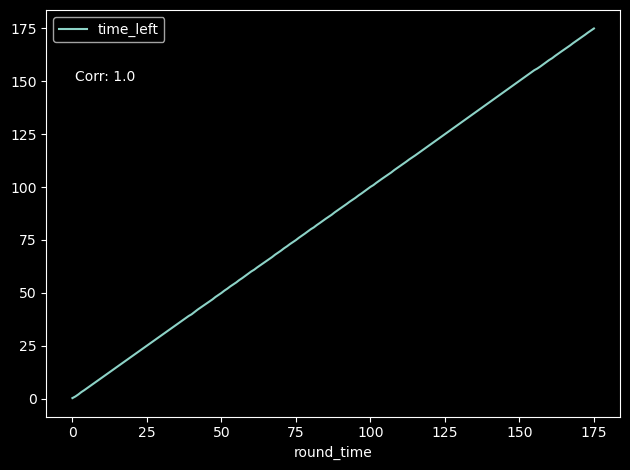

In [17]:
def get_times_grouped(data, _by='round_time'):
    return data.groupby(_by).mean()

times_grouped = get_times_grouped(df[['time_left', 'round_time']])
times_grouped.plot()
plt.text(1, 150, f'Corr: {times_grouped.corr().values[0][0]}')
plt.tight_layout()

> Conseguimos transformar nossos dados para segundos restantes em int, porém temos que inverter os dados para seguirem uma ordem cronológica.

In [18]:
print('Antes: ', df['round_time'].values[:10])
assert (df['round_time'].values[0] == 175)
df['round_time'] = 175 - df['round_time']
print('Depois: ', df['round_time'].values[:10])

Antes:  [175 156  96  76 175 115  95  75  55 175]
Depois:  [  0  19  79  99   0  60  80 100 120   0]


In [19]:
round_time_unique = list(df['round_time'].unique())
print(f'Quantidade de tempo restante no dataset: {len(round_time_unique)}')
round_time_limit = df['round_time'].max()
print(f'Quantidade máxima de segundos por round: {round_time_limit}')

Quantidade de tempo restante no dataset: 137
Quantidade máxima de segundos por round: 175


In [20]:
round_time_range = list(range(0, round_time_limit))
round_time_missing = [sec for sec in round_time_range if sec not in round_time_unique]
print(f'Total de valores faltantes: {len(round_time_missing)}\nTimestamps:\n{sorted(round_time_missing)}')

Total de valores faltantes: 39
Timestamps:
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


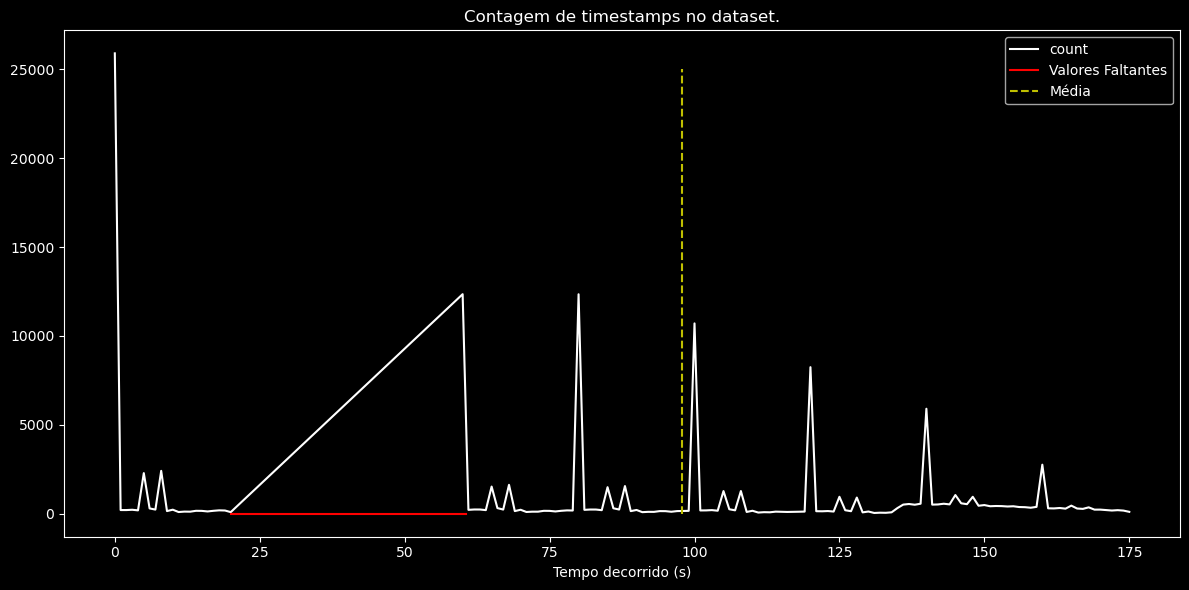

In [21]:
round_time_counts = df['round_time'].value_counts().sort_index()

fig = plt.figure(figsize=(12,6))
ax = round_time_counts.plot(color='w')
ax.set_xlabel('Tempo decorrido (s)')
#Valores faltantes
ax.axhline(y=0 ,xmin=0.15,xmax=0.36, color='red', label='Valores Faltantes')
#Média do total de cada timestamp 'time_left(int)'
ax.vlines(df['time_left'].mean(),ymin=0, ymax=25000, linestyles='--', label='Média', colors='y')

plt.title('Contagem de timestamps no dataset.')
plt.legend()
plt.tight_layout()

<a id='2-2'> </a>

### 2.2 - Rounds

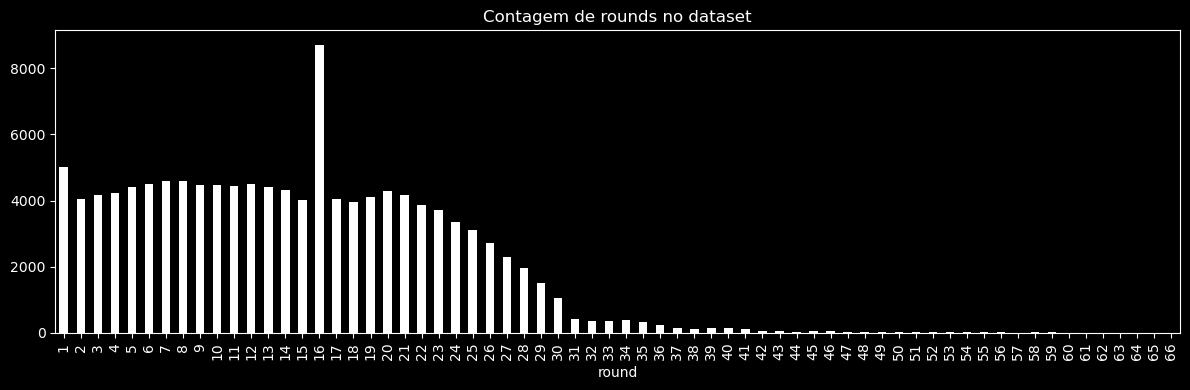

In [22]:
df['round'] = (df['ct_score'] + df['t_score']) + 1

fig = plt.figure(figsize=(12,4))
ax = df.value_counts('round').sort_index().plot.bar(color='w')
plt.title('Contagem de rounds no dataset')
plt.tight_layout()

CSGO tem um limite de 30 rounds em jogos normal, porém esse limite não é usado em partidas profissionais como as do dataset, pois um empate (15:15) acarreta rounds extras até que uma vantagem de 3 pontos seja atingida por qualquer equipe.

In [23]:
rounds_overtime = df[df['round'] > 30]
rounds_overtime_percent = len(rounds_overtime) / len(df['round']) * 100
print(f'Porcentagem do dataset que possuem mais de 30 rounds: {round(rounds_overtime_percent, 2)}% ( linhas)')

Porcentagem do dataset que possuem mais de 30 rounds: 2.76% ( linhas)


In [24]:
# Vamos eliminar os dados que o round e maior que 30
df = df[df['round'] <= 30]
rounds_overtime = df[df['round'] > 30]
rounds_overtime_percent = len(rounds_overtime) / len(df['round']) * 100
print(f'Porcentagem do dataset que possuem mais de 30 rounds: {round(rounds_overtime_percent, 2)}% ({len(rounds_overtime)} linhas)')

Porcentagem do dataset que possuem mais de 30 rounds: 0.0% (0 linhas)


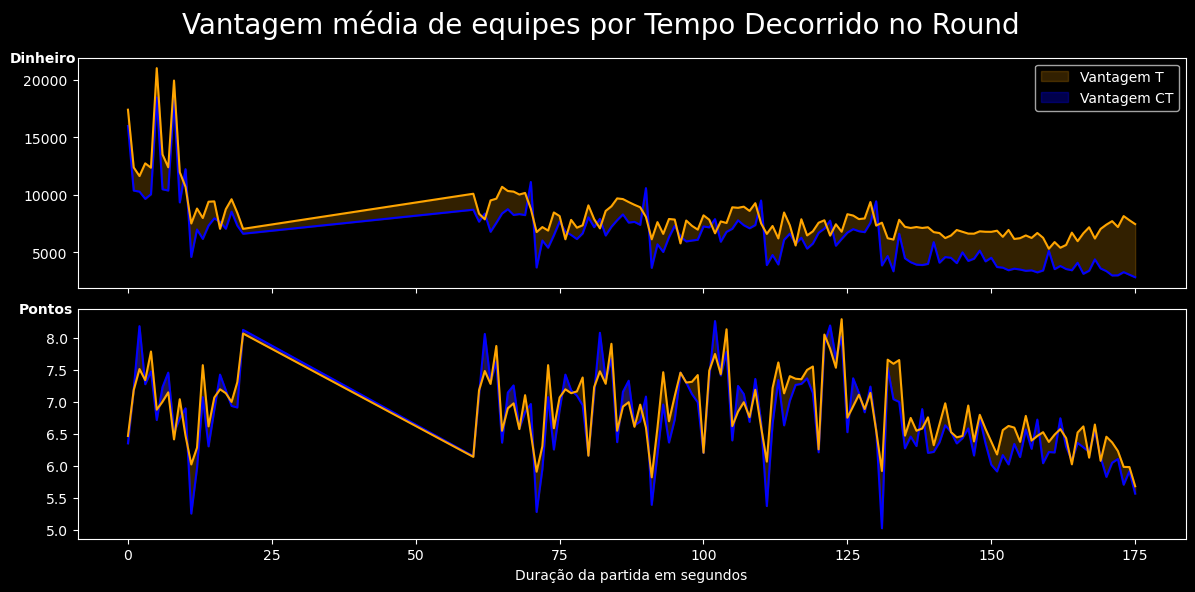

In [25]:
def show_diff_plot(dataf, ax, col1, col2):
    ax.plot(dataf[col1], color='b')
    ax.plot(dataf[col2], color='orange') 
    ax.fill_between(x=dataf.index, y1=dataf[col1],
                    y2 = dataf[col2], alpha=0.2, color='orange', label='Vantagem T')

    ax.set_xlabel('Duração da partida em segundos')
    ax.fill_between(x=dataf.index, y2=dataf[col1], y1 = dataf[col2],
                    where= dataf[col1] > dataf[col2],
                        alpha=0.3, color='b', label= 'Vantagem CT')
    
    ax1.set_ylabel('Dinheiro', rotation=0, labelpad=12, fontweight='bold')
    ax2.set_ylabel('Pontos', rotation=0, labelpad=12, fontweight='bold')
    ax1.yaxis.set_label_coords(-0.031, 0.97)
    ax2.yaxis.set_label_coords(-0.029, 0.97)

    #Média do total de cada timestamp 'time_left(int)'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6), sharex=True)
fig.suptitle('Vantagem média de equipes por Tempo Decorrido no Round', fontsize=20)


round_times_grouped = df[['round_time', 'ct_money', 't_money', 'ct_score', 't_score']].groupby('round_time').mean()
show_diff_plot(round_times_grouped, ax1, 'ct_money', 't_money')
show_diff_plot(round_times_grouped, ax2, 'ct_score', 't_score')

ax1.legend()
ax1.set_xlabel('')
plt.tight_layout()

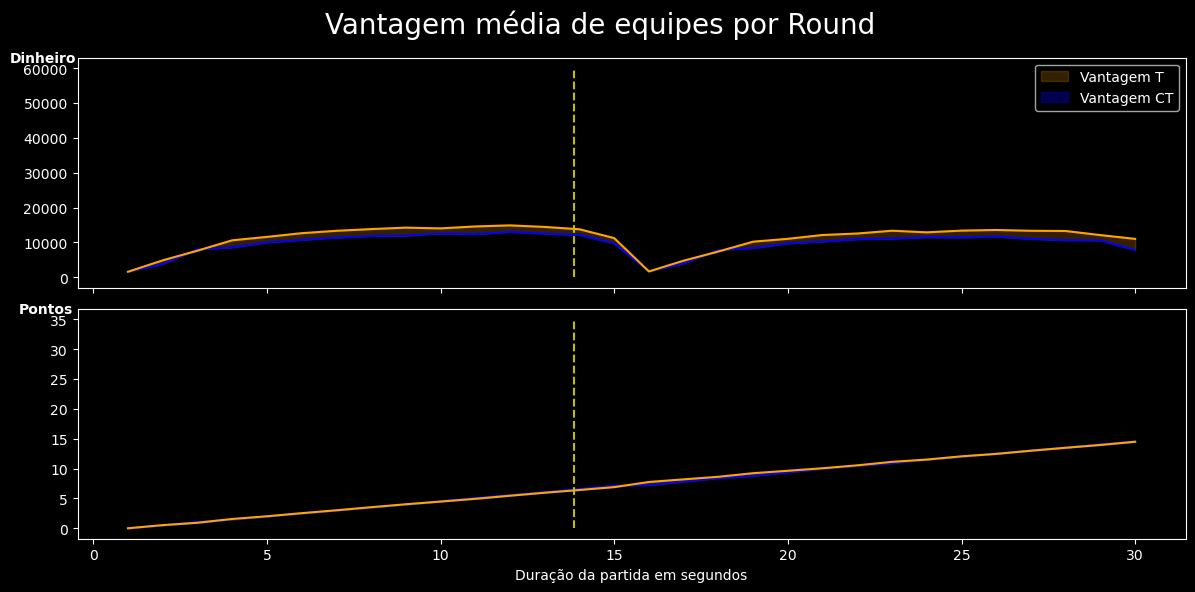

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6), sharex=True)

title = 'Vantagem média de equipes por Round'
fig.suptitle(title, fontsize=20)

round_grouped = df[['round', 'ct_money', 't_money', 'ct_score', 't_score']].groupby('round').mean()
show_diff_plot(round_grouped, ax1, 'ct_money', 't_money')
show_diff_plot(round_grouped, ax2, 'ct_score', 't_score')
ax1.legend()
ax1.set_xlabel('')
ax1.vlines(df['round'].mean(), ymin=0, ymax=60000, linestyles='--', label='Média', colors='y')
ax2.vlines(df['round'].mean(), ymin=0, ymax=35, linestyles='--', label='Média', colors='y')
plt.tight_layout()

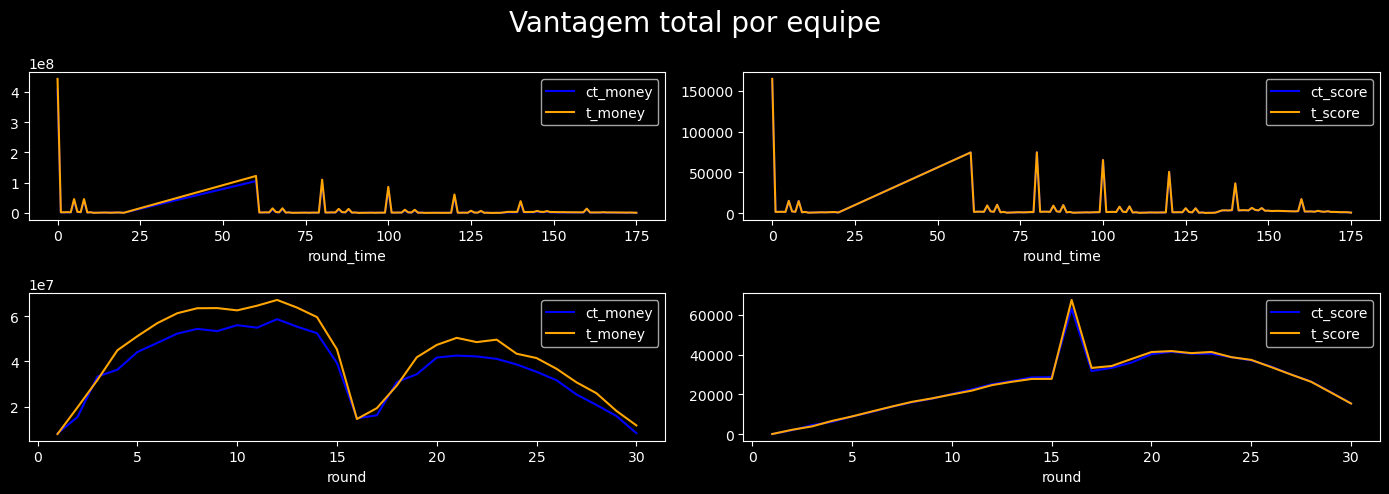

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(14,5))
plt.suptitle('Vantagem total por equipe', fontsize=20)
df[['round_time','ct_money','t_money']].groupby('round_time').sum().plot(ax=ax1[0], color=['b', 'orange'])
df[['round_time','ct_score','t_score']].groupby('round_time').sum().plot(ax=ax1[1], color=['b', 'orange'])
df[['round','ct_money','t_money']].groupby('round').sum().plot(ax=ax2[0], color=['b', 'orange'])
df[['round','ct_score','t_score']].groupby('round').sum().plot(ax=ax2[1], color=['b', 'orange'])
plt.tight_layout()

### 2.3 - game

In [31]:
game = 1
df['game'] = 0

for i in range(1, len(df.index)):        
    t_score, ct_score = df['t_score'].iloc[i - 1], df['ct_score'].iloc[i - 1] 
    current_scores = t_score + ct_score
    df.at[i-1, 'game'] = game

    next_scores =  df['t_score'].iloc[i] + df['ct_score'].iloc[i] 

    if next_scores < current_scores or df['map'].iloc[i] != df['map'].iloc[i-1]:
        game += 1

df.at[df.index[-1], 'game'] = game

print('Total de Jogos: ', game)

Total de Jogos:  813


In [32]:
df_game = df[info_columns + ['game']]
df_game.groupby('game').max()

,ct_health,ct_score,ct_armor,t_armor,ct_helmets,t_score,bomb_planted,t_health,time_left,t_money,ct_defuse_kits,ct_money,t_helmets,t_players_alive,ct_players_alive
game,,,,,,,,,,,,,,,
0.0,500.0,15.0,500.0,500.0,5.0,15.0,True,500.0,175.0,61450.0,5.0,69200.0,5.0,5.0,5.0
1.0,500.0,10.0,500.0,500.0,5.0,15.0,True,500.0,175.0,36100.0,5.0,51700.0,5.0,5.0,5.0
2.0,500.0,15.0,500.0,500.0,5.0,14.0,True,500.0,170.0,38950.0,5.0,34300.0,5.0,5.0,5.0
3.0,500.0,15.0,500.0,500.0,5.0,13.0,True,500.0,170.0,49500.0,5.0,31100.0,5.0,5.0,5.0
4.0,500.0,12.0,500.0,500.0,5.0,15.0,True,500.0,175.0,52400.0,5.0,42400.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809.0,500.0,3.0,200.0,500.0,0.0,7.0,False,500.0,175.0,29200.0,0.0,14850.0,5.0,5.0,5.0
810.0,500.0,3.0,500.0,500.0,0.0,7.0,False,500.0,167.0,29200.0,0.0,300.0,5.0,5.0,5.0
811.0,500.0,3.0,500.0,500.0,0.0,7.0,False,500.0,107.0,29200.0,0.0,300.0,5.0,5.0,5.0


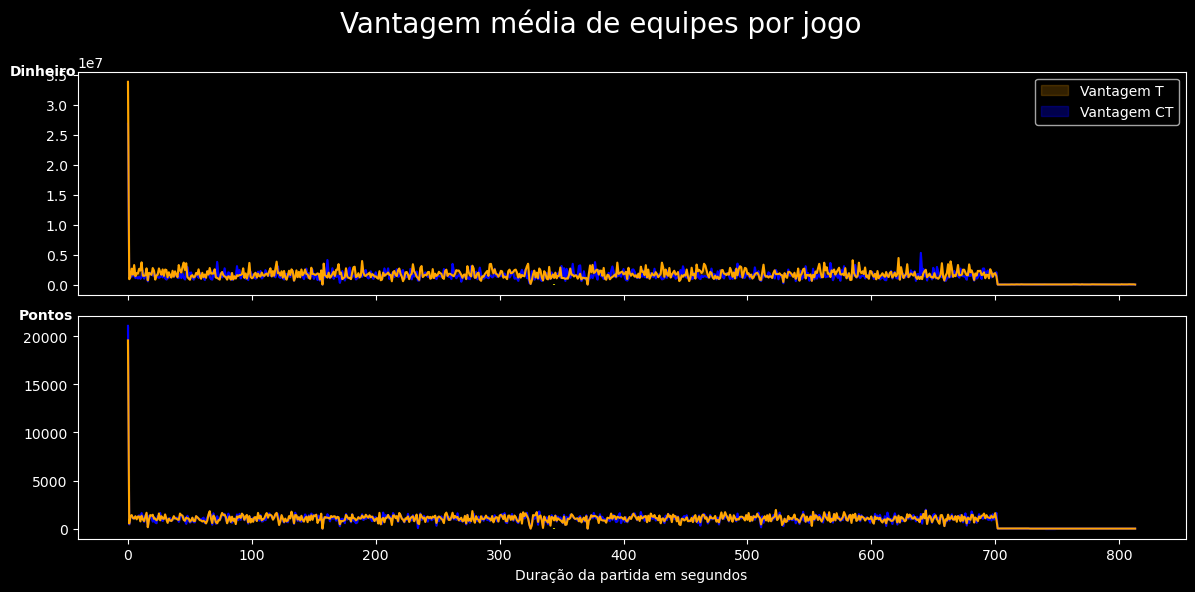

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6), sharex=True)

title = 'Vantagem média de equipes por jogo'
fig.suptitle(title, fontsize=20)

game_grouped = df[['game', 'ct_money', 't_money', 'ct_score', 't_score']].groupby('game').sum()
show_diff_plot(game_grouped, ax1, 'ct_money', 't_money')
show_diff_plot(game_grouped, ax2, 'ct_score', 't_score')
ax1.legend()
ax1.set_xlabel('')
ax1.vlines(df['game'].mean(), ymin=0, ymax=60000, linestyles='--', label='Média', colors='y')
ax2.vlines(df['game'].mean(), ymin=0, ymax=35, linestyles='--', label='Média', colors='y')
plt.tight_layout()

<a id='2-3'> </a>
#### 2.3 - round_winner

In [34]:
df['round_winner'].value_counts()

round_winner
T     60969
CT    58066
Name: count, dtype: int64

In [35]:
df_dummies = pd.get_dummies(df, columns=['round_winner'], prefix='round_winner', dtype=int)
df_dummies[['round_winner_T', 'round_winner_CT']].sum()

round_winner_T     60969
round_winner_CT    58066
dtype: int64

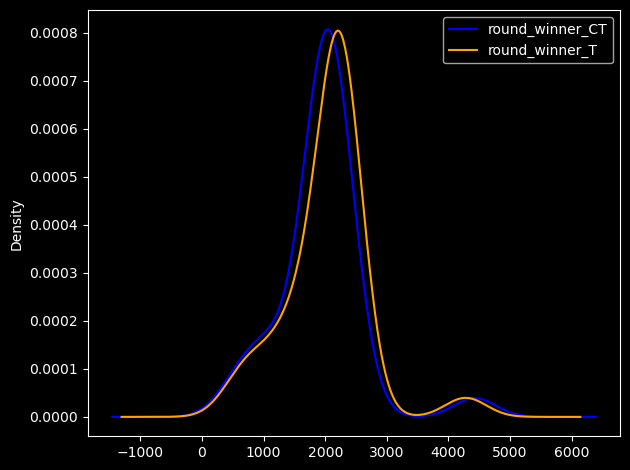

In [36]:
round_winner_df = df_dummies[df_dummies['round'] <= 30]
round_winner_df[['round','round_winner_CT', 'round_winner_T']].groupby('round').sum().plot.kde(color=['b', 'orange'])
plt.tight_layout()

In [37]:
df['y'] = df['round_winner'] == 'CT' 
df['y'] = df['y'].astype(int)
df['y']
# Agora 1 significa CT ganharam e 0 significa T ganharam

0         1
1         1
2         1
3         1
4         1
         ..
115690    0
115691    0
115692    0
115693    0
115694    0
Name: y, Length: 122371, dtype: int32

<a id='2-2'></a>
##### 2.2 - Armas

In [38]:
df[weapon_columns].describe().T.sort_values(by='mean' ,ascending=False).T

,t_weapon_glock,ct_weapon_usps,t_weapon_ak47,ct_weapon_m4a4,t_weapon_sg553,ct_weapon_awp,ct_weapon_deagle,t_weapon_deagle,t_weapon_awp,t_weapon_p250,ct_weapon_ak47,ct_weapon_sg553,ct_weapon_p250,ct_weapon_p2000,ct_weapon_cz75auto,ct_weapon_mp9,ct_weapon_aug,t_weapon_usps,t_weapon_galilar,ct_weapon_famas,t_weapon_mac10,t_weapon_cz75auto,ct_weapon_m4a1s,ct_weapon_ssg08,ct_weapon_fiveseven,t_weapon_m4a4,ct_weapon_ump45,t_weapon_ump45,t_weapon_tec9,t_weapon_ssg08,ct_weapon_galilar,t_weapon_fiveseven,ct_weapon_tec9,t_weapon_aug,ct_weapon_mac10,ct_weapon_xm1014,ct_weapon_glock,t_weapon_mp9,t_weapon_p2000,t_weapon_famas,ct_weapon_mag7,ct_weapon_elite,t_weapon_mp5sd,t_weapon_m4a1s,ct_weapon_mp7,t_weapon_mp7,t_weapon_elite,ct_weapon_mp5sd,ct_weapon_nova,ct_weapon_scar20,t_weapon_g3sg1,t_weapon_xm1014,ct_weapon_p90,t_weapon_p90,t_weapon_sawedoff,t_weapon_nova,t_weapon_bizon,t_weapon_r8revolver,t_weapon_mag7,t_weapon_scar20,t_weapon_negev,ct_weapon_m249,ct_weapon_bizon,ct_weapon_r8revolver,ct_weapon_sawedoff,ct_weapon_g3sg1,t_weapon_m249,ct_weapon_negev
count,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.000000,119035.00000,119035.000000,119035.000000,119035.000000,119035.0,119035.0,119035.0,119035.0,119035.0,119035.0
mean,3.316571,3.187592,1.238274,1.059394,0.812341,0.560743,0.443265,0.381098,0.313269,0.284664,0.276179,0.238854,0.228017,0.174209,0.153241,0.150687,0.132154,0.125635,0.113202,0.112874,0.110203,0.106296,0.061747,0.061192,0.058857,0.053909,0.047599,0.037468,0.027941,0.021011,0.011358,0.009602,0.008342,0.007804,0.007771,0.007737,0.006990,0.005797,0.005074,0.004864,0.004461,0.003755,0.002831,0.002797,0.002092,0.001999,0.001605,0.001504,0.001008,0.000714,0.000588,0.000269,0.000168,0.000160,0.000143,0.000109,0.000084,0.000059,0.00005,0.000008,0.000008,0.000008,0.0,0.0,0.0,0.0,0.0,0.0
std,1.623670,1.584971,1.363620,1.212644,1.132664,0.667583,0.836850,0.817319,0.472990,0.567852,0.585497,0.553677,0.521906,0.426499,0.448760,0.477813,0.458981,0.444343,0.410921,0.393542,0.416997,0.381561,0.256117,0.268325,0.281547,0.249688,0.232893,0.214032,0.190705,0.148032,0.113693,0.101239,0.096162,0.092376,0.095508,0.089142,0.087348,0.082695,0.075856,0.071714,0.067890,0.061165,0.055150,0.053763,0.046418,0.045231,0.040025,0.038749,0.031735,0.026713,0.031745,0.016394,0.012961,0.012633,0.011950,0.010450,0.009165,0.007668,0.00710,0.002898,0.002898,0.002898,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

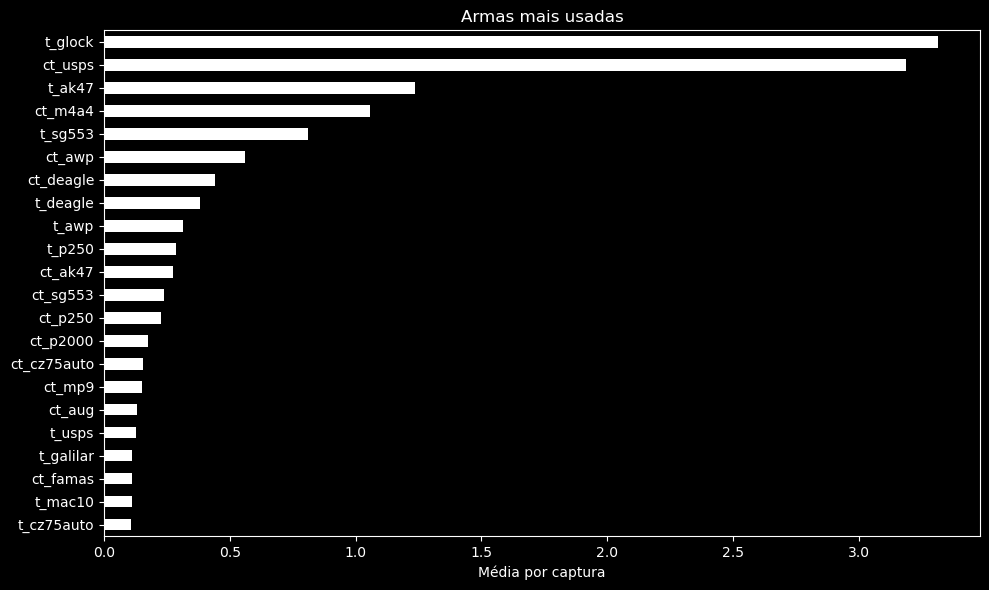

In [39]:
weapons_means = df[list(weapon_columns)].mean().sort_values(ascending=False)
weapons_sum = df[list(weapon_columns)].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
weapons_top_means = weapons_means[weapons_means > 0.1]
weapons_top_means[::-1].plot.barh('weapon', color='w', ax=ax)
plt.title('Armas mais usadas')
ytick_labels = [w.replace('weapon_', '') for w in weapons_top_means[::-1].index]
ax.set_yticklabels(ytick_labels)
ax.set_xlabel('Média por captura')
plt.tight_layout()

In [40]:
ct_weapon_columns = {col for col in all_columns if 'ct_weapon' in col}
t_weapon_columns = set(weapon_columns) - ct_weapon_columns
ct_weapon_columns, t_weapon_columns = list(ct_weapon_columns), list(t_weapon_columns)

print(f'Armas CT: {ct_weapon_columns[:10]}...\nArmas T:  {t_weapon_columns[:10]}...')

Armas CT: ['ct_weapon_m4a1s', 'ct_weapon_aug', 'ct_weapon_ssg08', 'ct_weapon_usps', 'ct_weapon_fiveseven', 'ct_weapon_mag7', 'ct_weapon_sg553', 'ct_weapon_ak47', 'ct_weapon_r8revolver', 'ct_weapon_cz75auto']...
Armas T:  ['t_weapon_p250', 't_weapon_r8revolver', 't_weapon_mac10', 't_weapon_elite', 't_weapon_ak47', 't_weapon_famas', 't_weapon_p2000', 't_weapon_fiveseven', 't_weapon_negev', 't_weapon_aug']...


In [41]:
ct_weapons_df = df.copy()[[w for w in weapon_columns if w.startswith('c')]]
ct_weapons_df['ct_weapon_m4'] = ct_weapons_df['ct_weapon_m4a4'] + ct_weapons_df['ct_weapon_m4a1s']
ct_weapons_df.drop(columns=['ct_weapon_m4a4', 'ct_weapon_m4a1s'], axis=1, inplace=True)
ct_weapons = ct_weapons_df.rename(columns=lambda x: x[10:])

t_weapons_df = df[[w for w in weapon_columns if not w.startswith('c')]]
t_weapons= t_weapons_df.rename(columns=lambda x: x[9:])

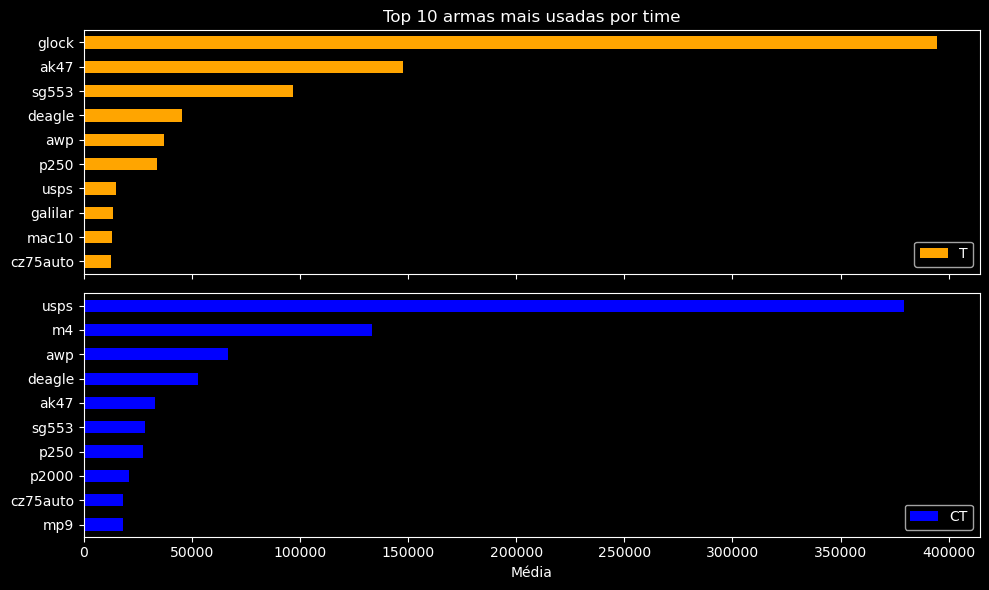

In [42]:
ct_top_weapons = ct_weapons.sum().sort_values(ascending=False)[:10]
t_top_weapons = t_weapons.sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax1.set_title('Top 10 armas mais usadas por time')
t_top_weapons[::-1].plot.barh(color='orange', ax=ax1, label='T')
ct_top_weapons[::-1].plot.barh(color = 'b', ax=ax2, label='CT')
ax1.legend(), ax2.legend(loc='lower right')
ax2.set_xlabel('Média')
plt.tight_layout()

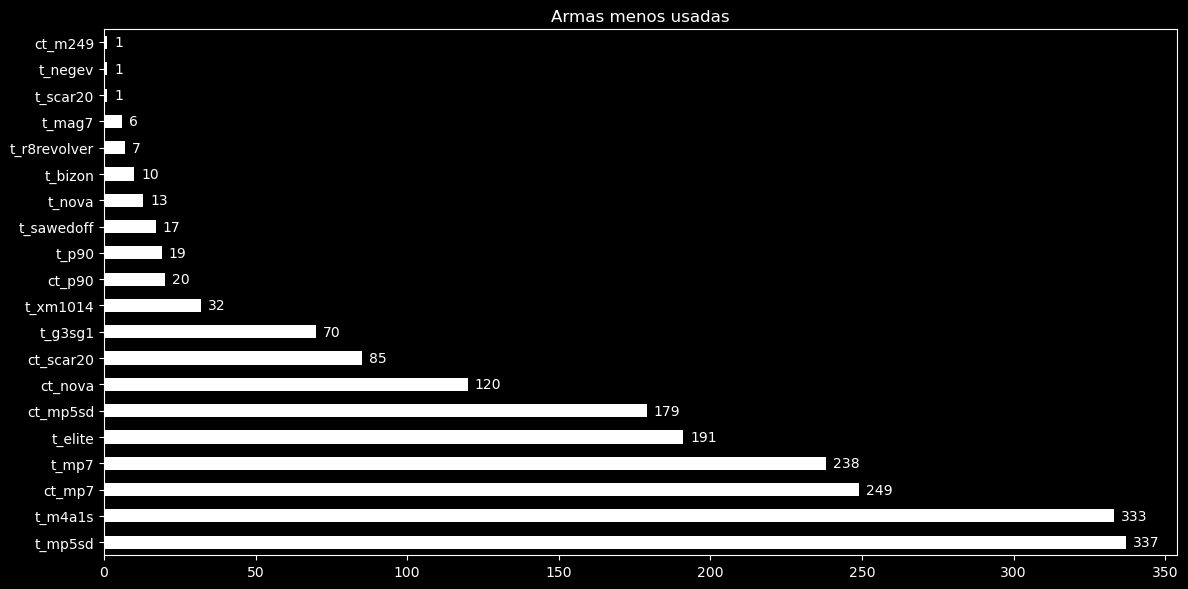

In [48]:
fig = plt.figure(figsize=(12, 6))
plt.title('Armas menos usadas')
least_used_weapons = weapons_sum[weapons_sum > 0][-20:]
ax = least_used_weapons.plot.barh('weapon', color=['w'])
ax.bar_label(ax.containers[0], padding=5)
ytick_labels = [w.replace('weapon_', '') for w in least_used_weapons.index]
ax.set_yticklabels(ytick_labels)
plt.tight_layout()

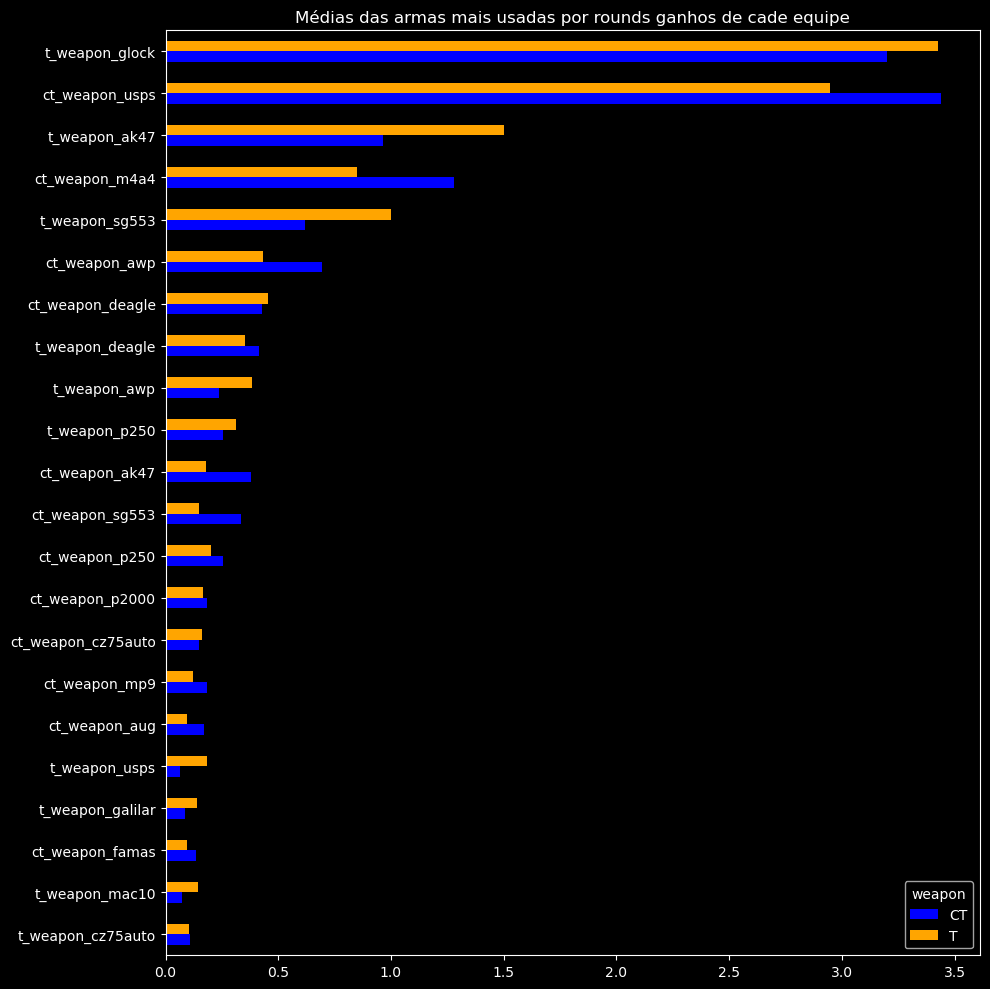

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Médias das armas mais usadas por rounds ganhos de cade equipe')
weapons_top_df = pd.DataFrame(weapons_top_means.rename_axis('weapon').reset_index(name='mean'))
weapon_round_winner = df[list(weapons_top_df['weapon']) + ['round_winner']].groupby('round_winner').mean().rename_axis('weapon').T
weapon_round_winner[::-1].plot.barh(color = ['b', 'orange'], ax=ax)
ax.set_yticklabels(ytick_labels)
plt.tight_layout()

In [52]:
ct_weapons_m4s = ['ct_weapon_m4a4', 'ct_weapon_m4a1s']
df['ct_weapon_m4'] = df[ct_weapons_m4s].sum(axis=1).astype(int)
df = df.drop(ct_weapons_m4s, axis=1)
df['ct_weapon_m4']

0         0
1         0
2         0
3         0
4         0
         ..
115690    0
115691    0
115692    0
115693    0
115694    0
Name: ct_weapon_m4, Length: 122371, dtype: int32

In [ ]:
ct_other_ar = ['ct_weapon_ak47', 'ct_weapon_aug', 'ct_weapon_famas', 'ct_weapon_scar20', 'ct_weapon_sg553']
df['ct_weapon_ar'] = df[ct_other_ar].sum(axis=1).astype(int)
df = df.drop(ct_other_ar, axis=1)

t_other_ar = ['t_weapon_aug', 't_weapon_famas', 't_weapon_g3sg1', 't_weapon_galilar', 't_weapon_m4a1s', 't_weapon_m4a4', 't_weapon_scar20' ,'t_weapon_sg553']
df['t_weapon_ar'] = df[t_other_ar].sum(axis=1).astype(int)
df = df.drop(t_other_ar, axis=1)

In [ ]:
pistols_columns = {'t_weapon_glock',
                    'ct_weapon_usps',
                    'ct_weapon_deagle',
                    't_weapon_deagle',
                    't_weapon_p250',
                    'ct_weapon_p250',
                    'ct_weapon_p2000',
                    'ct_weapon_cz75auto',
                    't_weapon_cz75auto',
                    'ct_weapon_fiveseven',
                    't_weapon_fiveseven',
                    't_weapon_tec9'}

ct_pistol_columns = {col for col in pistols_columns if 'ct' in col}
df['ct_pistols'] = df[list(ct_pistol_columns)].sum(axis=1).astype(int)
df = df.drop(list(ct_pistol_columns), axis=1)

t_pistol_columns = pistols_columns - ct_pistol_columns
df['t_pistols'] = df[list(t_pistol_columns)].sum(axis=1).astype(int)
df = df.drop(list(t_pistol_columns), axis=1)

In [ ]:
meta_weapon_columns = {'ct_weapon_m4', 'ct_weapon_ak47', 't_weapon_ak47'}
awp_columns = {'ct_weapon_awp', 't_weapon_awp'}

other_weapons_columns = set(weapon_columns) - set(ct_other_ar) - set(t_other_ar) - awp_columns - pistols_columns - meta_weapon_columns - set(ct_weapons_m4s)

ct_other_weapons = {col for col in other_weapons_columns if 'ct' in col}
df['ct_weapon_other'] = df[list(ct_other_weapons)].sum(axis=1).astype(int)
df = df.drop(list(ct_other_weapons), axis=1)

t_other_weapons = list(other_weapons_columns - ct_other_weapons)
df['t_weapon_other'] = df[t_other_weapons].sum(axis=1).astype(int)
df = df.drop(t_other_weapons, axis=1)

### grenades

In [60]:
ct_grenade_columns = {col for col in grenade_columns if 'ct' in col}
t_grenade_columns = grenade_columns - ct_grenade_columns

ct_grenade_columns, t_grenade_columns = list(ct_grenade_columns), list(t_grenade_columns)

print(f'Granadas CT: {ct_grenade_columns}...\nGranadas T:  {t_grenade_columns}...')

Granadas CT: ['ct_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade', 'ct_grenade_smokegrenade', 'ct_grenade_hegrenade', 'ct_grenade_flashbang', 'ct_grenade_decoygrenade']...
Granadas T:  ['t_grenade_flashbang', 't_grenade_hegrenade', 't_grenade_decoygrenade', 't_grenade_molotovgrenade', 't_grenade_smokegrenade', 't_grenade_incendiarygrenade']...


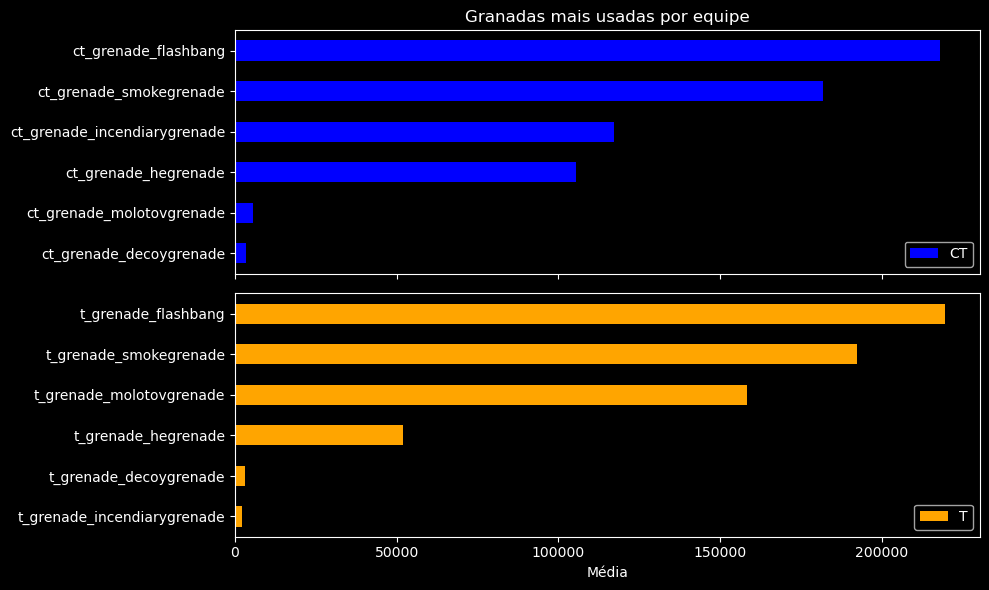

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax1.set_title('Granadas mais usadas por equipe')
df[ct_grenade_columns].sum().sort_values().plot.barh(color='b', ax=ax1, label='CT')
df[t_grenade_columns].sum().sort_values().plot.barh(color = 'orange', ax=ax2, label='T')
ax1.legend(), ax2.legend(loc='lower right')
ax2.set_xlabel('Média')
plt.tight_layout()

In [62]:
import seaborn as sns
pd.options.mode.chained_assignment = None

df['ct_grenades'] = df[ct_grenade_columns].sum(axis=1)
df['t_grenades'] = df[t_grenade_columns].sum(axis=1)
df = df.drop(grenade_columns, axis=1)


### map

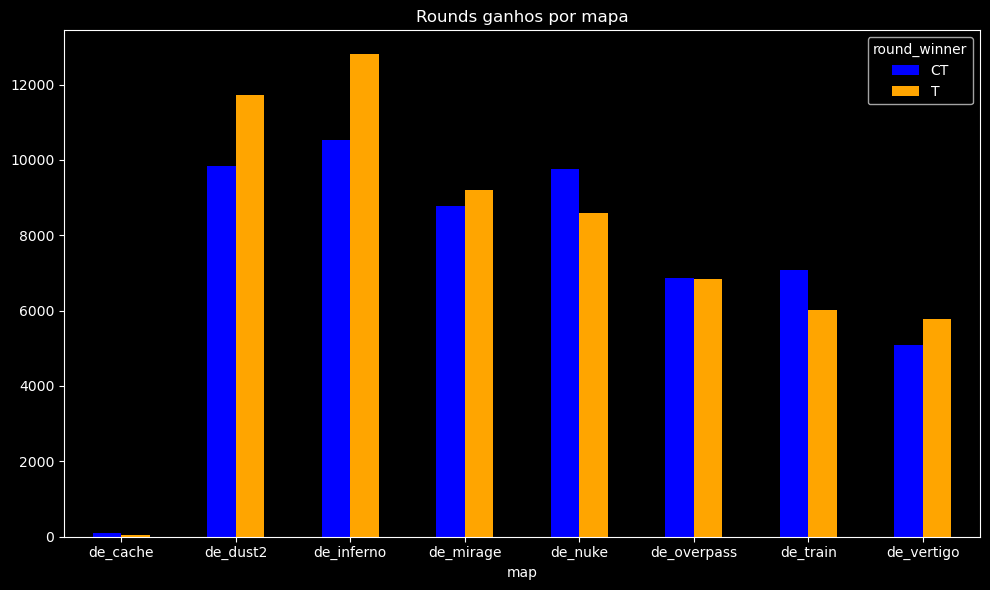

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
map_round_winner = df.groupby(['map'])['round_winner'].value_counts().unstack()
map_round_winner.plot.bar(color = ['b', 'orange'], ax=ax)
plt.title("Rounds ganhos por mapa")
ax.set_xticklabels(labels=map_round_winner.T, rotation=0)
plt.tight_layout()

In [65]:
de_cache = df[df['map'] == 'de_cache']
# Vamos eliminar os dados do mapa de_cache
df = df[df['map'] != 'de_cache']
de_cache_percent = len(de_cache) / len(df) * 100
print(f'Porcentagem do dataset que jogados no mapa de_cache: {round(de_cache_percent, 2)}% ({len(de_cache)} linhas)')

Porcentagem do dataset que jogados no mapa de_cache: 0.12% (145 linhas)


In [66]:
df = df.drop(['time_left', 'game'] ,axis=1)

In [67]:
df = pd.get_dummies(data=df, columns=['map'], prefix='map', dtype=int)
df.filter(regex='^map').describe().T

### defuse_kits

In [71]:
df.dropna(inplace=True)

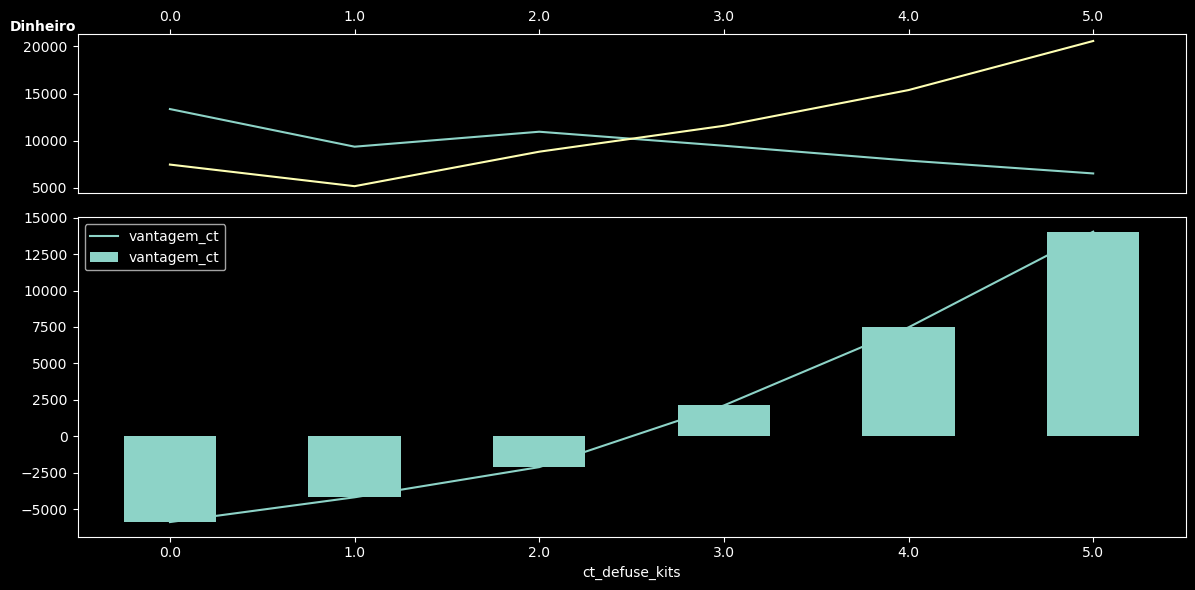

In [72]:
defuse_kit_df = df.copy().select_dtypes(exclude='object')
defuse_kit_money = defuse_kit_df.groupby('ct_defuse_kits').mean()
defuse_kit_money['vantagem_ct'] = defuse_kit_money['ct_money'] - defuse_kit_money['t_money']

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(12,6), gridspec_kw = {'height_ratios':[1,2]})
defuse_kit_money['t_money'].plot(ax=ax1, label='Dinheiro T')
defuse_kit_money['ct_money'].plot(ax=ax1, label='Dinhero CT')

defuse_kit_money['vantagem_ct'].plot.bar(ax=ax2)
defuse_kit_money['vantagem_ct'].plot(ax=ax2)
#plt.fill_between(x=list(range(5)), y1=defuse_kit_money['vantagem_ct'].min())
plt.legend()
ax1.xaxis.set_ticks_position('top')
ax1.set_ylabel('Dinheiro', rotation=0, labelpad=12, fontweight='bold')
ax1.yaxis.set_label_coords(-0.031, 1)
plt.tight_layout()

<a id='3'></a>
### 1. Treinamento dos Modelos

Vamos treinar dois modelos para classificar o ganhador do round:
- Decision Tree Classifier
- Random Forest Classifier

In [96]:
df.info()

ValueError: invalid literal for int() with base 10: 'CT'

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['y'].to_numpy()
X = df.drop(['y', 'round_winner'] , axis=1).astype(int).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Accuracy: 0.8238708049457482


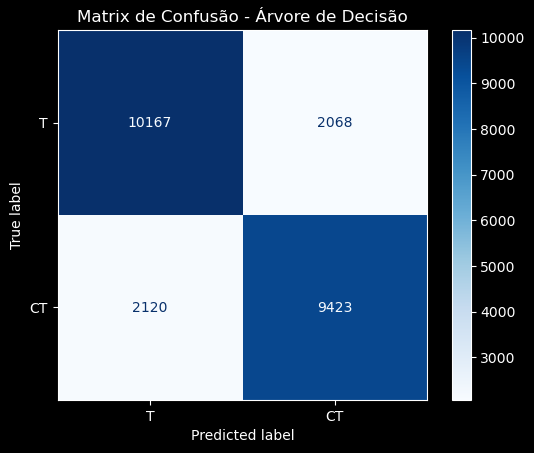

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

class_labels = ['T', 'CT']

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Prevendo os valores
dt_predictions = dt_classifier.predict(X_test)

# Avaliando as métricas
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy}")

cm_dt = confusion_matrix(y_test, dt_predictions)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=class_labels)
disp_dt.plot(cmap='Blues', values_format='d')
plt.title('Matrix de Confusão - Árvore de Decisão')
plt.show()

In [100]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc

# Precisão, recall e F1-score
dt_report = classification_report(y_test, dt_predictions, target_names=class_labels)

print("Relatório de classificação para Árvore de Decisão:")
print(dt_report)

Relatório de classificação para Árvore de Decisão:
              precision    recall  f1-score   support

           T       0.83      0.83      0.83     12235
          CT       0.82      0.82      0.82     11543

    accuracy                           0.82     23778
   macro avg       0.82      0.82      0.82     23778
weighted avg       0.82      0.82      0.82     23778



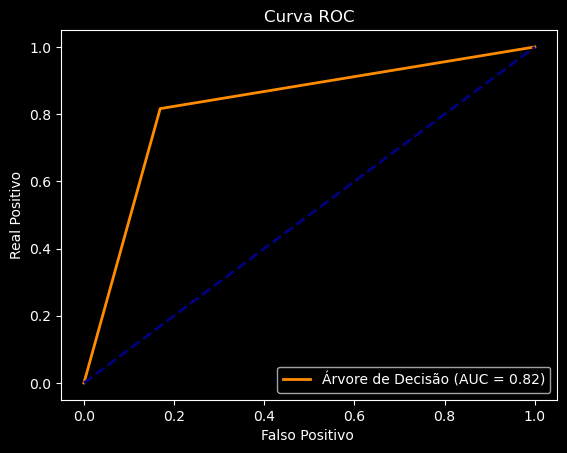

In [101]:
# ROC e AUC da Arvore de Decisão
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_predictions)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Árvore de Decisão (AUC = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('Falso Positivo ')
plt.ylabel('Real Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Random Forest Accuracy: 0.8810665320884852


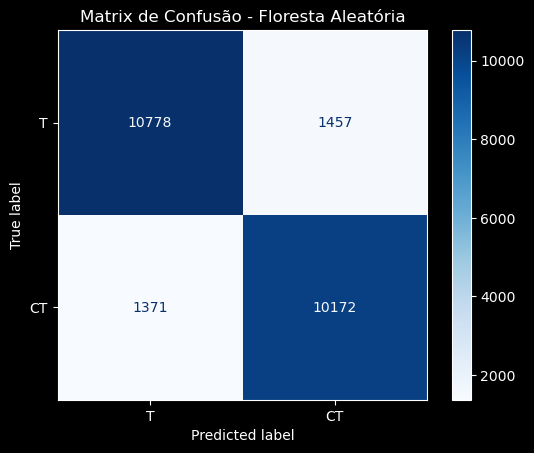

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predições
rf_predictions = rf_classifier.predict(X_test)

# Avaliação do modelo
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

cm_rf = confusion_matrix(y_test, rf_predictions)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_labels)
disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Matrix de Confusão - Floresta Aleatória')
plt.show()

In [81]:
# Precisão, recall e F1-score
rf_report = classification_report(y_test, rf_predictions, target_names=class_labels)

print("Relatório de classificação para Árvore de Decisão:")
print(rf_report)

Relatório de classificação para Árvore de Decisão:
              precision    recall  f1-score   support

           T       0.89      0.88      0.88     12235
          CT       0.87      0.88      0.88     11543

    accuracy                           0.88     23778
   macro avg       0.88      0.88      0.88     23778
weighted avg       0.88      0.88      0.88     23778



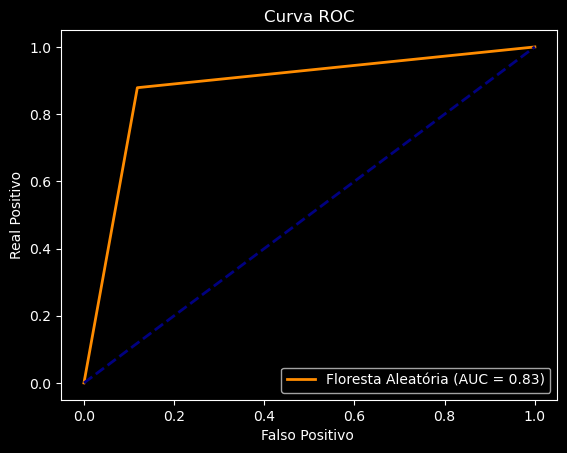

In [82]:
# ROC e AUC da Floresta Aleatória
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_predictions)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Floresta Aleatória (AUC = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('Falso Positivo ')
plt.ylabel('Real Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import parallel_backend
from pprint import pprint


def random_forest_random_search(X, y, n_iter=100, cv=5, random_state=42):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    random_grid = {
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap
    }

    # Create the RandomForestClassifier
    rf = RandomForestClassifier()

    # Use RandomizedSearchCV to perform random search
    rf_random = RandomizedSearchCV(
        estimator=rf,
        param_distributions=random_grid,
        n_iter=n_iter,
        cv=cv,
        random_state=random_state,
        n_jobs=-1  # Set to -1 to use all available CPU cores
    )
    
    parallel_backend('threading')
    # Fit the model
    rf_random.fit(X, y)

    # Print the best parameters
    print("Best Parameters:")
    pprint(rf_random.best_params_)

    return rf_random

rf_best_model = random_forest_random_search(X, y)


In [95]:
df

,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,t_weapon_ak47,ct_weapon_awp,t_weapon_awp,round_winner,round_time,round,y,ct_weapon_ar,t_weapon_ar,ct_pistols,t_pistols,ct_weapon_m4,ct_weapon_other,t_weapon_other,ct_grenades,t_grenades,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,CT,0.0,1.0,1,0,0,5,5,0,0,0,0.0,0.0,1,0,0,0,0,0,0
1,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,CT,19.0,1.0,1,0,0,5,5,0,0,0,0.0,2.0,1,0,0,0,0,0,0
2,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,CT,79.0,1.0,1,0,0,4,4,0,0,0,0.0,2.0,1,0,0,0,0,0,0
3,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,CT,99.0,1.0,1,0,0,4,3,0,0,1,0.0,0.0,1,0,0,0,0,0,0
4,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,CT,0.0,2.0,1,0,0,5,5,0,0,0,0.0,0.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,11.0,14.0,True,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0,1.0,0.0,1.0,T,160.0,26.0,0,0,2,2,4,1,1,0,2.0,3.0,0,0,0,0,0,1,0
122406,11.0,15.0,False,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0,0.0,0.0,1.0,T,0.0,27.0,0,0,1,5,5,1,0,0,2.0,2.0,0,0,0,0,0,1,0
122407,11.0,15.0,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0,2.0,0.0,1.0,T,60.0,27.0,0,0,1,5,5,1,0,0,10.0,14.0,0,0,0,0,0,1,0
122408,11.0,15.0,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0,2.0,0.0,1.0,T,80.0,27.0,0,0,2,5,5,1,0,0,3.0,12.0,0,0,0,0,0,1,0


In [91]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy



base_accuracy = evaluate(rf_classifier, X_test, class_labels)
base_accuracy
#rf_best_accuracy= evaluate(rf_best_model, y_test, class_labels)

#print('Improvement of {:0.2f}%.'.format( 100 * (rf_best_accuracy - base_accuracy) / base_accuracy))

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('int32'), dtype('<U2')) -> None

In [94]:
X_test

array([[8.0, 7.0, False, ..., 0, 0, 0],
       [7.0, 6.0, False, ..., 0, 0, 0],
       [1.0, 3.0, True, ..., 0, 1, 0],
       ...,
       [3.0, 0.0, False, ..., 0, 0, 0],
       [11.0, 8.0, False, ..., 0, 0, 0],
       [6.0, 9.0, False, ..., 0, 0, 0]], dtype=object)